<a href="https://colab.research.google.com/github/Overleaff/Image_processing/blob/main/Chap3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arithmetical Operation**






In [ ]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/Overleaff/image/main/IMG_20190727_011317.jpg
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/pexels-aleksandar-pasaric-2341830.jpg

operation_path = "pexels-aleksandar-pasaric-2341830.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2290k  100 2290k    0     0  9914k      0 --:--:-- --:--:-- --:--:-- 9914k


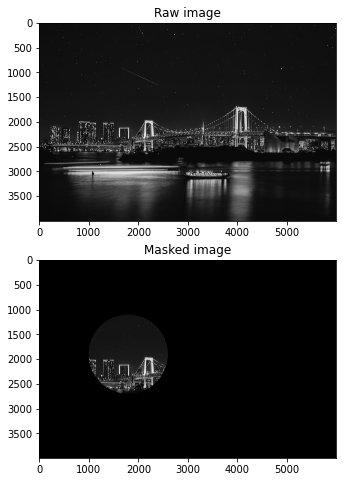

In [ ]:
from io import RawIOBase
import cv2
from matplotlib import pyplot as plt
import numpy as np

#initialize array subplot
size = 2
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 4)
f.set_figwidth(size * 4)

####
raw_operation = cv2.imread(operation_path, 0)

mask = np.zeros(raw_operation.shape[:2], dtype="uint8")
cv2.circle(mask, (1800, 1900), 800, 255, -1)
masked = cv2.bitwise_and(raw_operation, raw_operation, mask=mask)

axarr[0].imshow(raw_operation, cmap='gray')
axarr[0].title.set_text('Raw image')

axarr[1].imshow(masked, cmap='gray')
axarr[1].title.set_text('Masked image')

####
plt.show()

# Binary Image

In [ ]:
!pip3 install numpy

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/animal/cat.jpg

bin_path = "cat.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  182k  100  182k    0     0   852k      0 --:--:-- --:--:-- --:--:--  852k


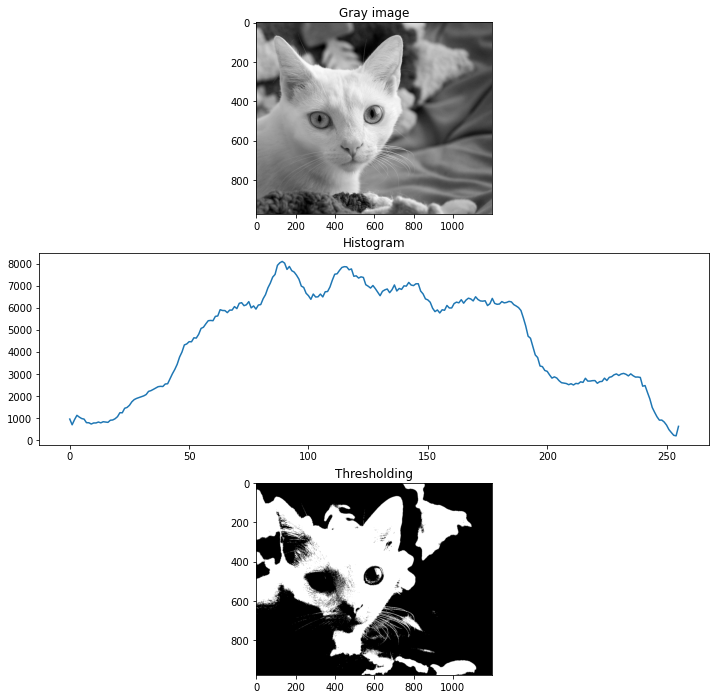

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#initialize array subplot
size = 3
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 4)
f.set_figwidth(size * 4)
####
bin_ori = cv2.imread(bin_path, 0)

axarr[0].imshow(bin_ori, cmap='gray')
axarr[0].title.set_text('Gray image')

####

histg = cv2.calcHist([bin_ori],[0],None,[256],[0,256]) 

axarr[1].plot(histg)
axarr[1].title.set_text('Histogram')

####
ret, thresh = cv2.threshold(bin_ori,150,200,cv2.THRESH_BINARY)
axarr[2].imshow(thresh, cmap='gray')
axarr[2].title.set_text('Thresholding')

### Opening and closing nua 

plt.show()

# Fourier Transform

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/sunFlower.jpg

fourier_path = "sunFlower.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2738k  100 2738k    0     0  9540k      0 --:--:-- --:--:-- --:--:-- 9540k


(1697, 2434, 2)
(1697, 2434, 2)


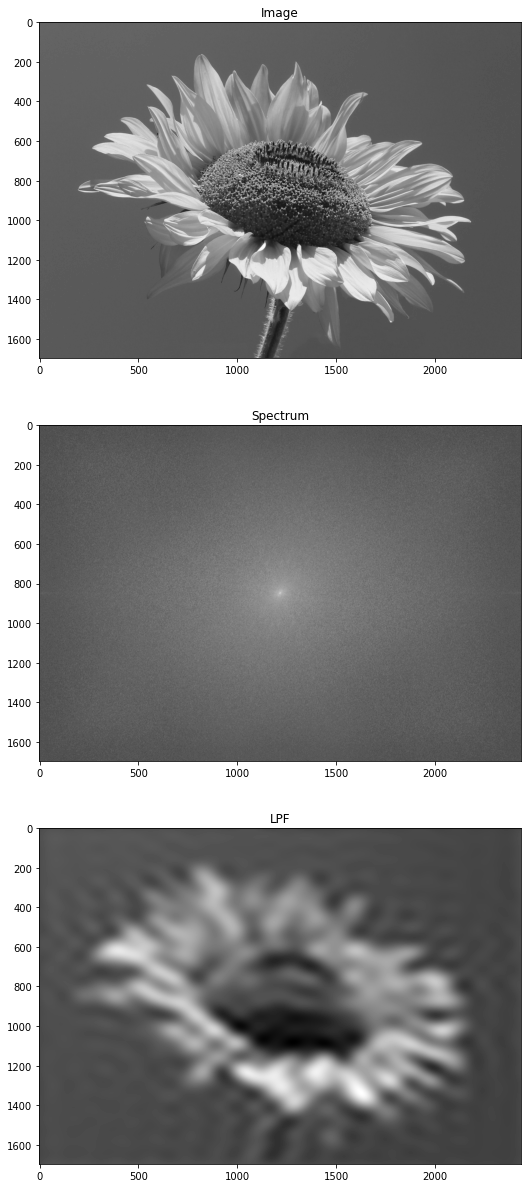

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

#initialize array subplot
size = 3
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)
####
raw_image = cv.imread(fourier_path, 0)

axarr[0].imshow(raw_image, cmap='gray')
axarr[0].title.set_text('Image')
####
dft = cv.dft(np.float32(raw_image),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

axarr[1].imshow(magnitude_spectrum, cmap = 'gray')
axarr[1].title.set_text('Spectrum')

### low pass filter and high pass filter
rows, cols = magnitude_spectrum.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-15:crow+15, ccol-15:ccol+15] = 1

# apply mask and inverse DFT
print(dft_shift.shape)
fshift = dft_shift*mask
print(fshift.shape)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

axarr[2].imshow(img_back, cmap = 'gray')
axarr[2].title.set_text('LPF')

plt.show()